In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
# default style set
plt.style.use('default')
plt.rcParams['figure.figsize'] = (6,3)
plt.rcParams['font.size'] = 12

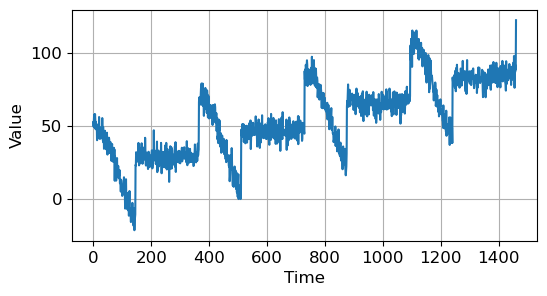

In [9]:
def plot_series(time, series, format='-', start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
    
def trend(time, slope=0):
    return slope * time

def seansonal_pattern(season_time):
    return np.where(season_time < 0.4, np.cos(season_time * 2 * np.pi), 1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time + phase) % period) / period
    return amplitude * seansonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype = "float32")
baseline = 10
series = trend(time, 0.1)
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

plot_series(time, series)
plt.show()


trend(), seasonality(), noise()함수는 각각 경향성, 계절성, 노이즈를 갖는 시계열 데이터를 반환함
이 함수들을 사용하여 시계열 데이터를 만들고 위와 같이 시각화 함.

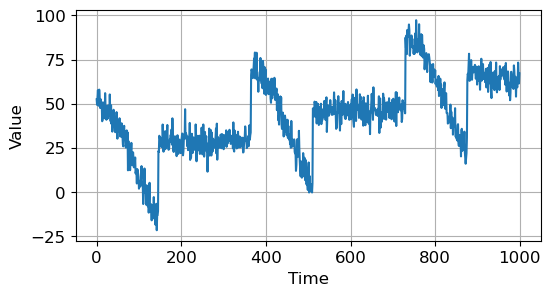

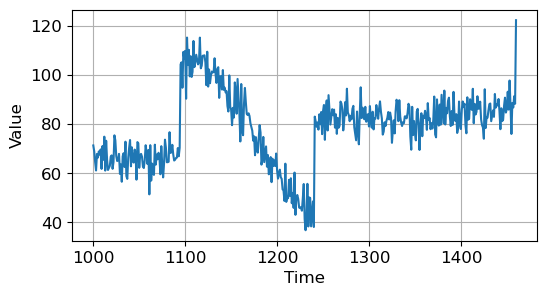

In [10]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]

time_valid = time[split_time:]
x_valid = series[split_time:]

plot_series(time_train, x_train)
plt.show()

plot_series(time_valid, x_valid)
plt.show()

시계열 데이터의 앞부분 1000개를 훈련용, 나머지를 검증용으로 분리함
위와 같이 두부분으로 나눠짐

### Naive Forecast
naive_forecast는 말 그대로 이전의 데이터를 다음 값으로 예측하는 시계열 데이터임
한스텝 앞의 데이터를 가져와서 나타내면 아래와 같음

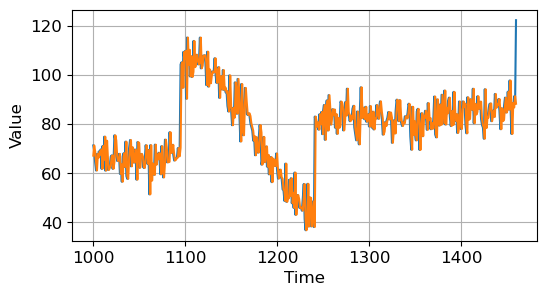

In [14]:
# 예제1
naive_forecast = series[split_time - 1: -1]
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

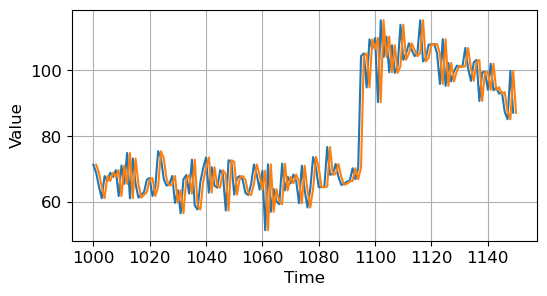

In [15]:
# 예제2
plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, naive_forecast, start=1, end=151)

그래프 플롯의 시작 지점을 한스텝 뒤로 하였음
앞에서 150개의 데이터를 나타내면 위와 같음

In [16]:
# 예제3
print(keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

61.827534
5.9379086


### 지난 30개의 평균값으로 예측하기

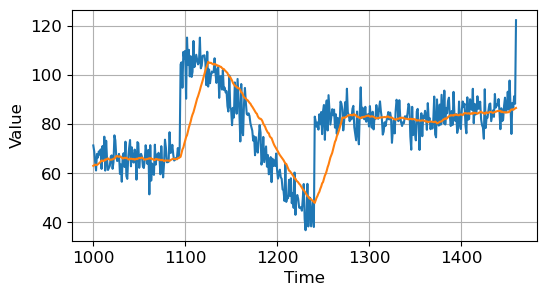

In [18]:
# 예제1

def moving_average_forecast(series, window_size):
    forecast=[]
    for time in range(len(series) - window_size):
        forecast.append(series[time: time + window_size].mean())
    return np.array(forecast)

moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

oving_average_forecast()함수는 window_size 동안의 평균값을 다음 예측값으로 사용함.<br>
아래 그림의 주황색 곡선으로 나타냄.

In [19]:
#예제 2
print(keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

106.674576
7.142419


mean_squared_error(), maen_absolute_error()함수로 예측의 오차값